# How to plot a choropleth map

In [14]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

import seaborn as sns

import matplotlib.patches as patches
from matplotlib.colors import ListedColormap

In [19]:
shppath='C:/data/naturalearth/'
shapename = 'ne_admin_0_countries'
#shapename ='world-country-boundaries.shp'

shapename = 'admin_0_countries'
countries_shp = shpreader.natural_earth(resolution='110m',
                                        category='cultural', name=shapename)

In [ ]:
# define some data to plot

In [46]:
df=pd.DataFrame({'pop':[8,20,15,120],'gdp':[120,30,50,250]},index=['Austria','Argentina','Australia','United Stated'])
df.head()

,pop,gdp
Austria,8,120
Argentina,20,30
Australia,15,50
United Stated,120,250


In [47]:
country_df=pd.DataFrame({'ISO Country code':['AUT','ARG','AUS','USA']},index=['Austria','Argentina','Australia','United Stated'])
country_df

,ISO Country code
Austria,AUT
Argentina,ARG
Australia,AUS
United Stated,USA


In [ ]:
# define some data to plot

In [56]:
def plotmap(ax,df,col):
    k=0
    for ic in country_df['ISO Country code']:

        for country in shpreader.Reader(countries_shp).records():

            if country.attributes['ADM0_A3']==ic:
               
                data_country=country_df[country_df['ISO Country code']==ic].index[0]
                c=df.loc[data_country,col]
               
                print(country.attributes['NAME_LONG'])
                p=ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                              facecolor=cmap_list(1.*c),lw=0)#,
                              #label=country.attributes['name_long'])

        k+=1
    ax.outline_patch.set_visible(False)
    ax.set_extent([-180, 180, -60, 90], crs=ccrs.PlateCarree())

Austria
Argentina
Australia
United States


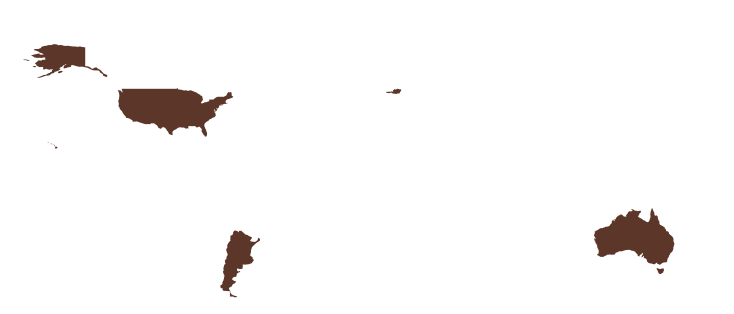

In [58]:
sc=0
cmap=sns.cubehelix_palette(10, start=-2.3, rot=.5, reverse=False,light=.75,dark=.25)
cmap_list=ListedColormap(cmap)

plt.figure(figsize=(10,10))
ax = plt.axes([0,0,1,1],projection=ccrs.PlateCarree())
plotmap(ax,df,'pop')